In [1]:
import os
import sys
import datetime as dt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.signal as signal
import scipy.optimize as opt

from latrt_testing import utils
import fts_data_routines as routines
import bandpass_helpers as bp
import latrt_testing.demodulation as demod
from random import randrange
import latrt_testing.fft_ops as fft_ops
from so3g.hk import load_range

from sotodlib.io.load_smurf import * 
from sotodlib.tod_ops.fft_ops import rfft
from sotodlib.tod_ops.detrend import detrend_tod
from sotodlib.tod_ops.flags import get_trending_flags, get_glitch_flags
#from sotodlib.flags.glitches import get_
from sotodlib.tod_ops import pca

import logging
import os
logger.setLevel(logging.DEBUG)

from sotodlib.io import load_smurf

import sotodlib
from sotodlib import core
context_file = "context.yaml"
ctx = core.Context(context_file)

obs_list = ctx.obsdb.query("timestamp>1724000000 and timestamp<1726000000")

In [2]:
np.where(obs_list['timestamp'] > 1725305952)[0][0]

np.int64(145)

In [3]:
obs_list[145]

OrderedDict([('obs_id', 'obs_1725305971_lati1_001'),
             ('timestamp', 1725305969.5593376),
             ('start_time', 1725305969.5593376),
             ('stop_time', 1725308175.2593374),
             ('n_samples', 441141),
             ('telescope', 'lat'),
             ('telescope_flavor', 'lat'),
             ('tube_slot', 'i1'),
             ('tube_flavor', 'mf'),
             ('type', 'obs'),
             ('subtype', 'stream'),
             ('wafer_count', 1),
             ('detector_flavor', None),
             ('duration', 2205.699999809265),
             ('az_center', 180.00033337519628),
             ('az_throw', 0.00012282190741075283),
             ('el_center', 90.00180705943546),
             ('el_throw', 0.0002086635913727264),
             ('roll_center', 30.001188680160027),
             ('roll_throw', 0.00029028431593935977),
             ('wafer_slots_list', 'ws2'),
             ('stream_ids_list', 'ufm_mv28')])

In [4]:
obs_list[144]

OrderedDict([('obs_id', 'obs_1725305757_lati1_001'),
             ('timestamp', 1725305755.5343375),
             ('start_time', 1725305755.5343375),
             ('stop_time', 1725305812.0743375),
             ('n_samples', 11309),
             ('telescope', 'lat'),
             ('telescope_flavor', 'lat'),
             ('tube_slot', 'i1'),
             ('tube_flavor', 'mf'),
             ('type', 'obs'),
             ('subtype', 'stream'),
             ('wafer_count', 1),
             ('detector_flavor', None),
             ('duration', 56.53999996185303),
             ('az_center', 180.0002695689677),
             ('az_throw', 3.5664764141074556e-05),
             ('el_center', 90.00198993850046),
             ('el_throw', 3.928948265041754e-05),
             ('roll_center', 30.001247211061823),
             ('roll_throw', 8.201692129361504e-05),
             ('wafer_slots_list', 'ws2'),
             ('stream_ids_list', 'ufm_mv28')])

## Check 1 min chopper stream to make sure we see 8 Hz

In [6]:
np.where(obs_list['timestamp'] > 1725305739)[0][0]

np.int64(144)

In [ ]:
meta = ctx.get_meta(obs_list[144]['obs_id'])
aman = ctx.get_obs(meta)

In [ ]:
routines.check_chopper_signal(aman)

# Check spectrum!

In [5]:
obs_list[145]

OrderedDict([('obs_id', 'obs_1725305971_lati1_001'),
             ('timestamp', 1725305969.5593376),
             ('start_time', 1725305969.5593376),
             ('stop_time', 1725308175.2593374),
             ('n_samples', 441141),
             ('telescope', 'lat'),
             ('telescope_flavor', 'lat'),
             ('tube_slot', 'i1'),
             ('tube_flavor', 'mf'),
             ('type', 'obs'),
             ('subtype', 'stream'),
             ('wafer_count', 1),
             ('detector_flavor', None),
             ('duration', 2205.699999809265),
             ('az_center', 180.00033337519628),
             ('az_throw', 0.00012282190741075283),
             ('el_center', 90.00180705943546),
             ('el_throw', 0.0002086635913727264),
             ('roll_center', 30.001188680160027),
             ('roll_throw', 0.00029028431593935977),
             ('wafer_slots_list', 'ws2'),
             ('stream_ids_list', 'ufm_mv28')])

In [6]:
meta = ctx.get_meta(obs_list[145]['obs_id'])
aman = ctx.get_obs(meta)

In [7]:
meta.obs_info.duration

2205.699999809265

This function has now been added to sotodlib
using power threshold of 100:


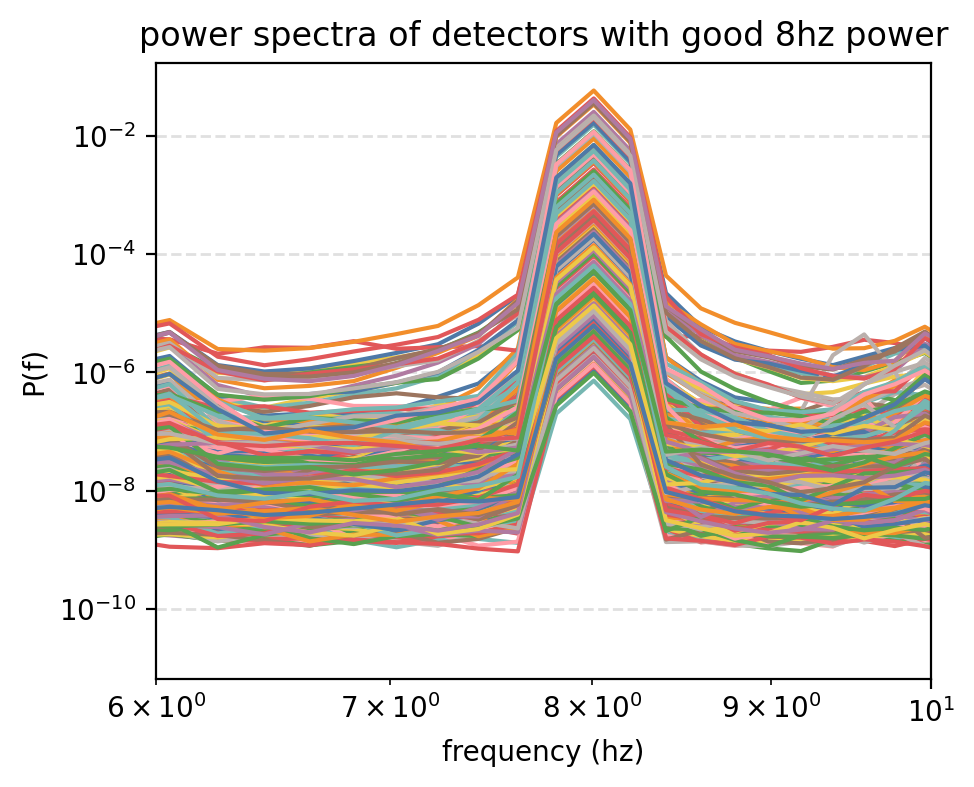

number of detectors with higher power in 8hz = 395


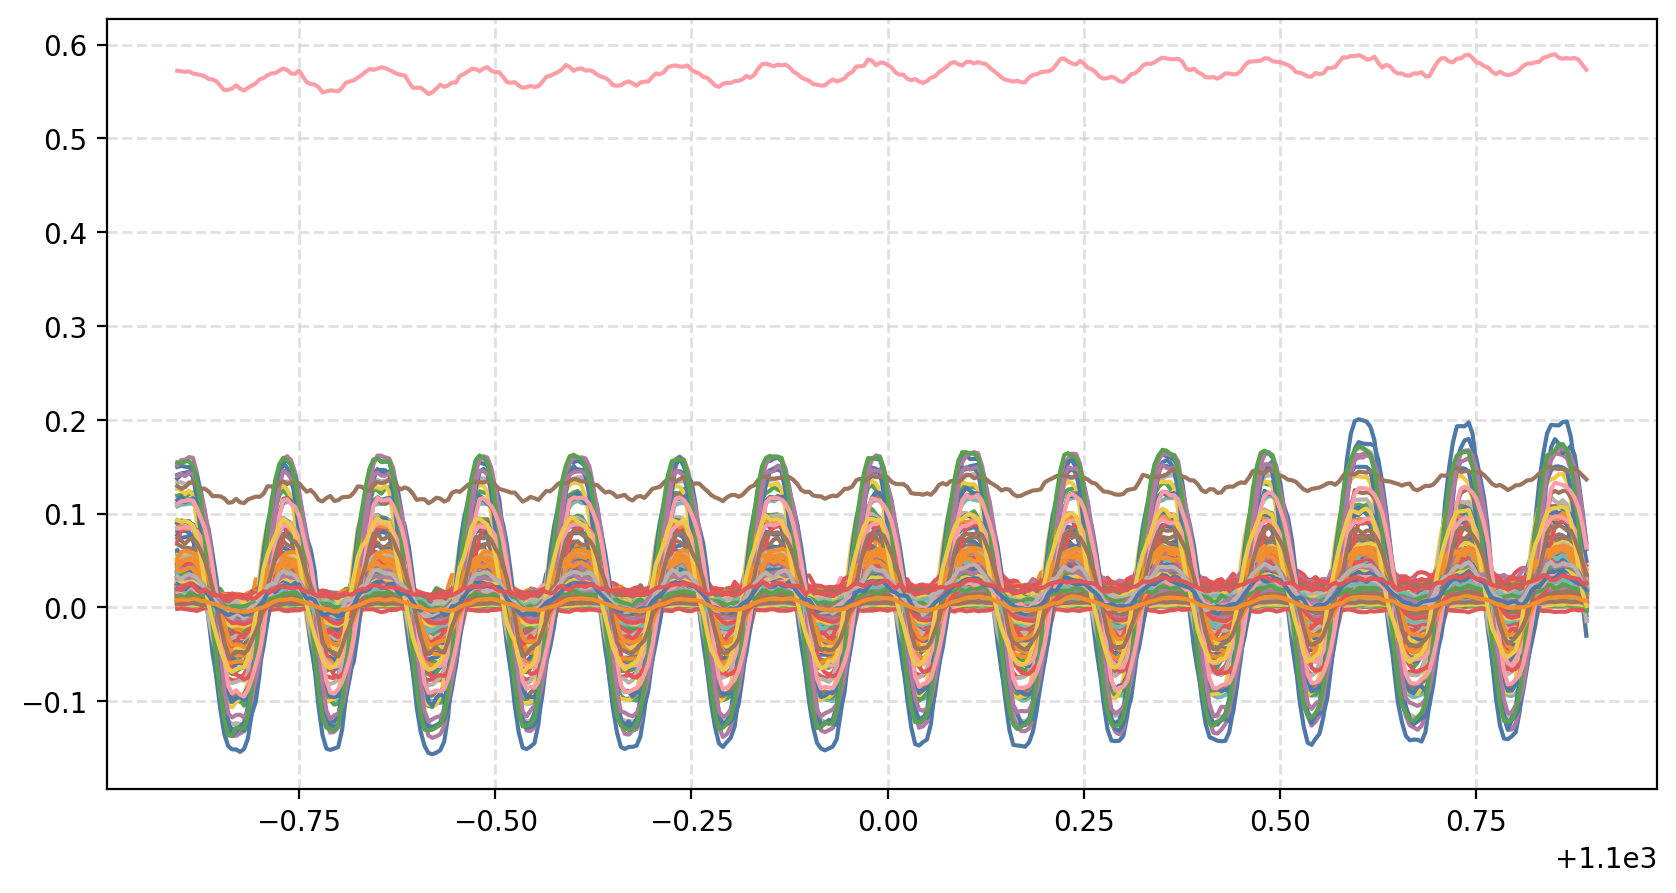

mean, median, std of fitted phases: 2.29, 2.27, 0.31


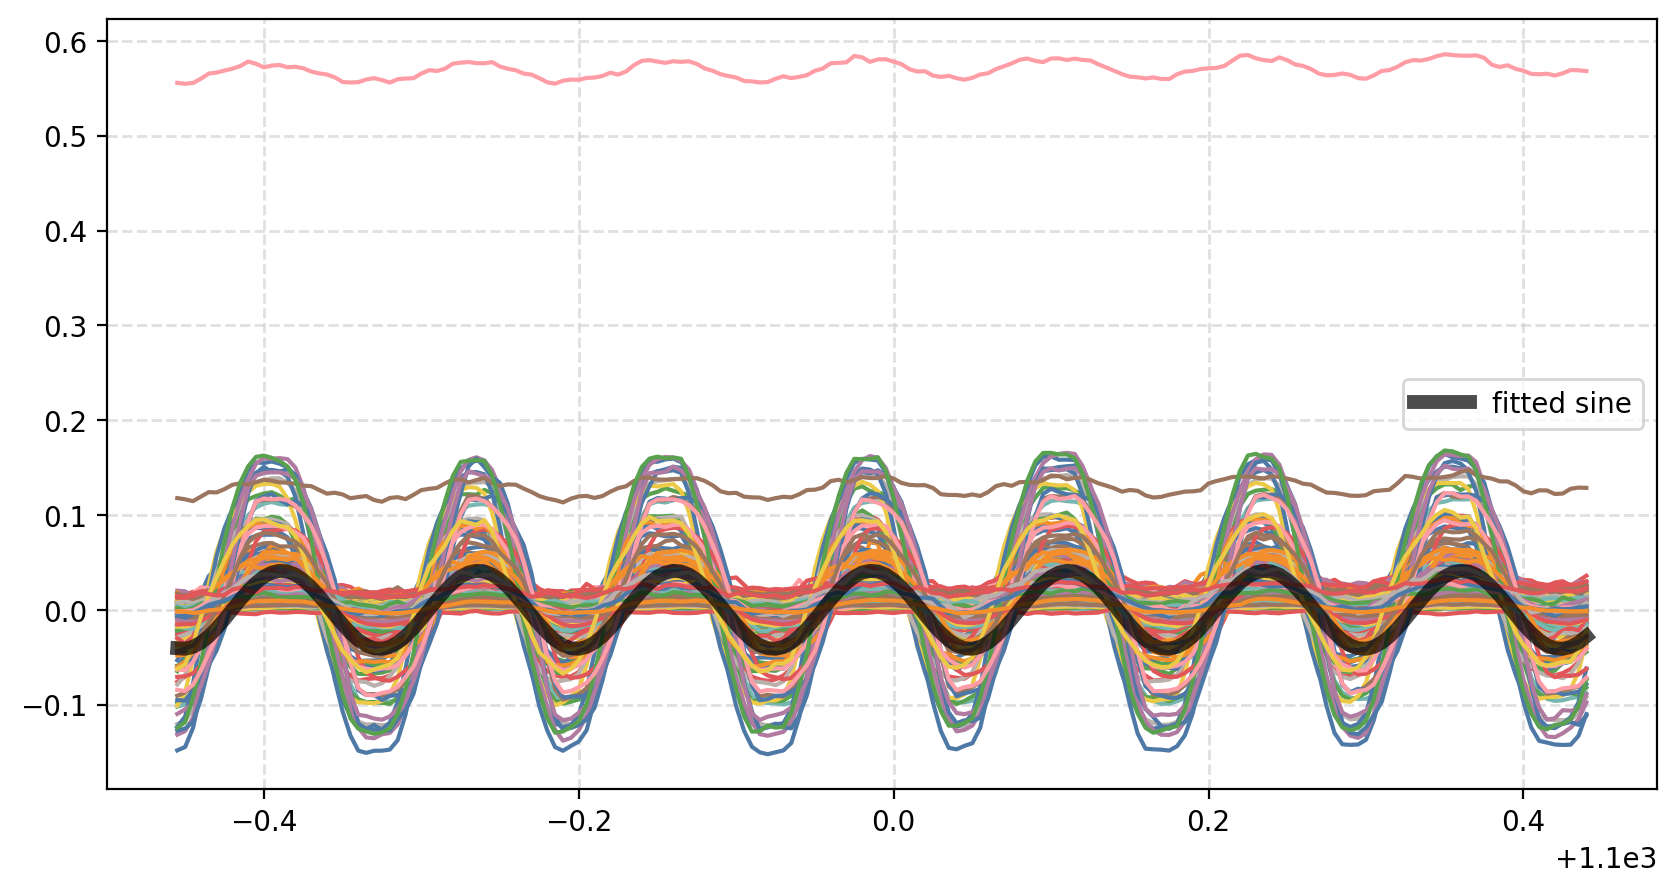

Phase fitting standard deviation is slightly high, check hist


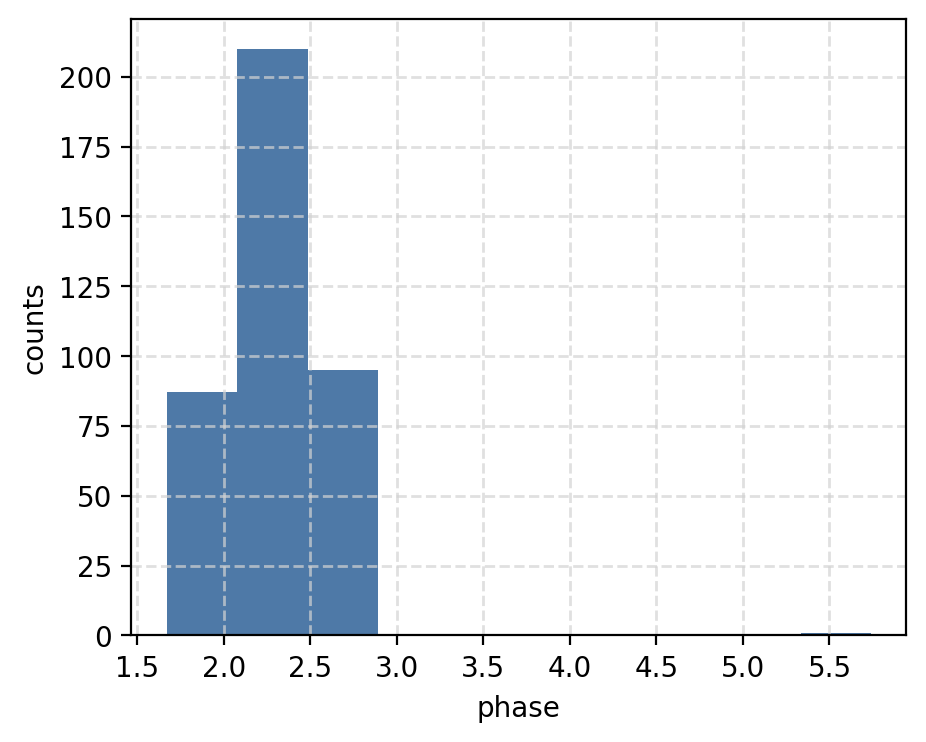

getting integrated signal...


  0%|          | 0/5 [00:00<?, ?it/s]

37.5
no housekeeping data at fts position -19.35. Using data from previous position


100%|██████████| 1775/1775 [00:25<00:00, 69.13it/s]


number of interferograms in band -1: 0


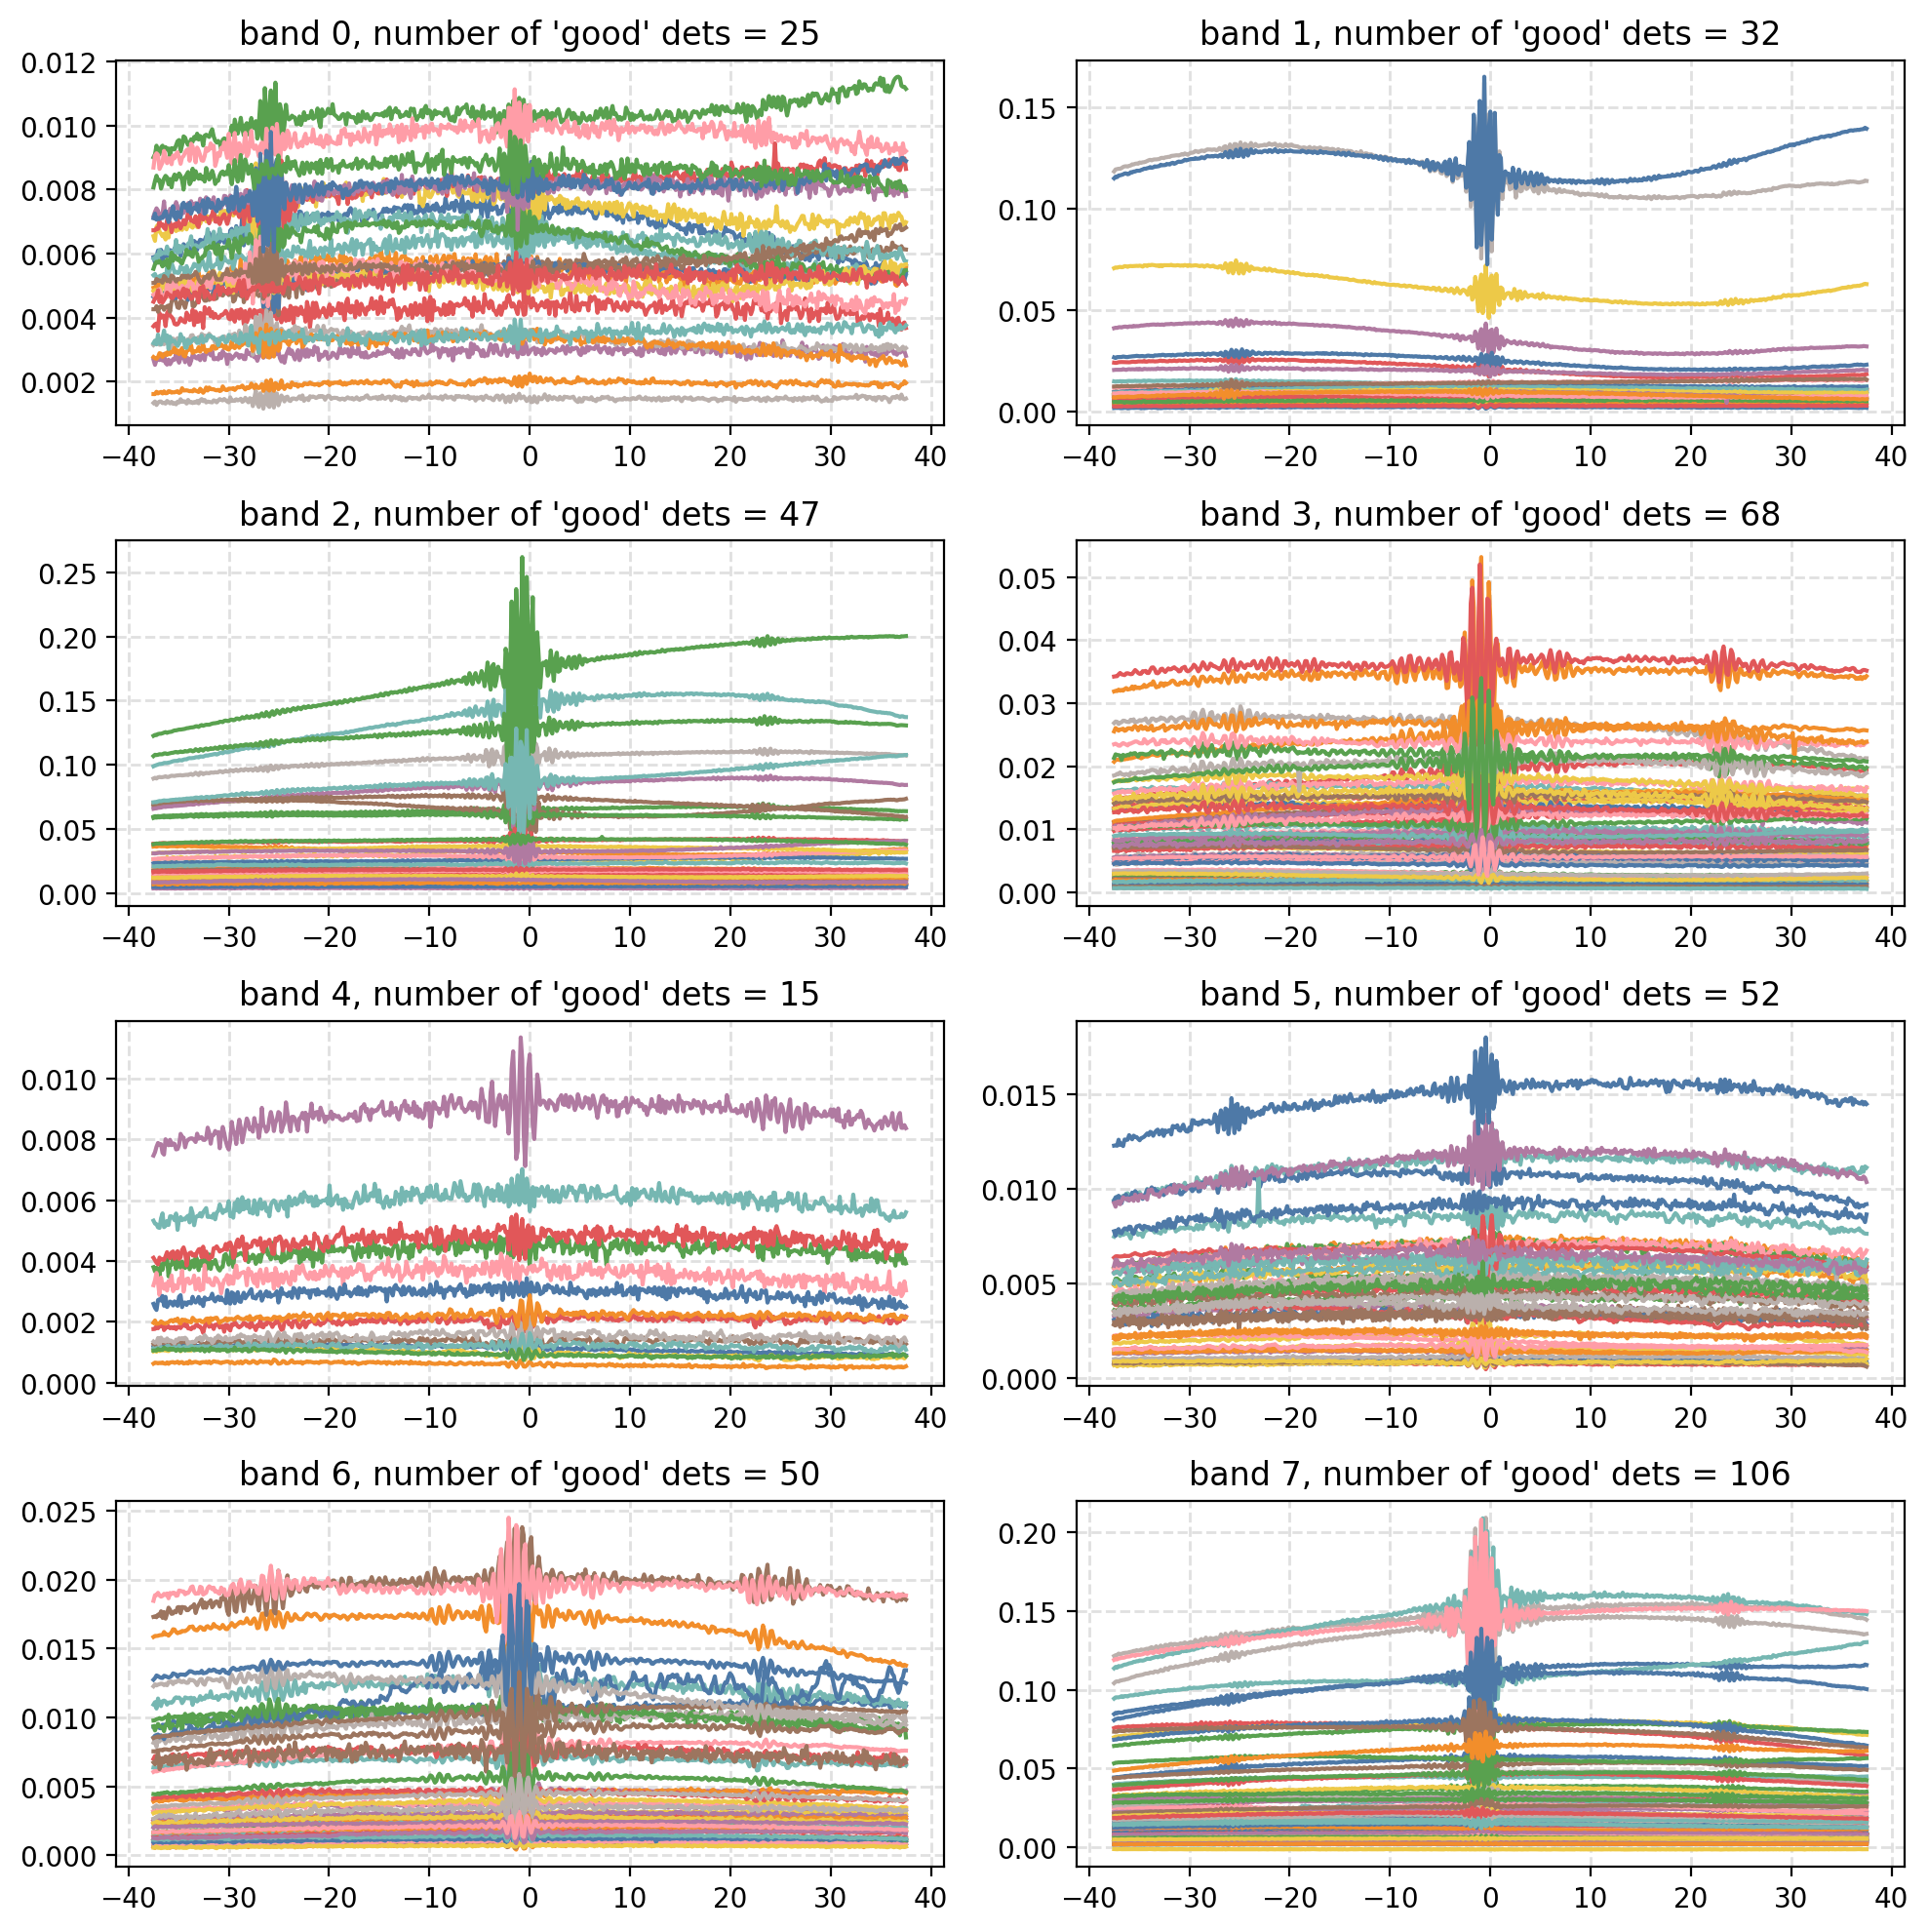

data saved to location FTS interferogram data mv28/run_0_interferograms.npz


array([[ 5.8841668e-03,  5.7338076e-03,  5.8945767e-03, ...,
         5.3373640e-03,  5.4164119e-03,  5.6141191e-03],
       [ 1.6885159e-03,  1.7924715e-03,  1.9669621e-03, ...,
         1.7647226e-03,  2.0449900e-03,  1.9328047e-03],
       [ 3.2462334e-04,  3.1097766e-04,  3.3948084e-04, ...,
         3.0291118e-04,  2.6300520e-04,  2.5931673e-04],
       ...,
       [ 7.8359008e-05,  1.0598277e-05,  5.7523641e-05, ...,
        -2.7817475e-06,  7.6412049e-05,  4.8740494e-05],
       [ 4.6391380e-03,  4.7326442e-03,  4.6092239e-03, ...,
         5.5586416e-03,  5.2413759e-03,  5.2668494e-03],
       [ 5.9129931e-03,  4.9162712e-03,  4.9596434e-03, ...,
         6.7638080e-03,  8.4718578e-03,  7.1526109e-03]],
      shape=(1775, 501), dtype=float32)

In [8]:
band_channel_map = {}
for i, (channel, band) in enumerate(np.array([aman.det_info.smurf.channel, aman.det_info.smurf.band]).T):
    band_channel_map[(band, channel)] = i
interferograms = routines.process_run_ufm(aman, 'FTS interferogram data mv28', band_channel_map,
                     middle_relative_time=1100, threshold=1.0, index_limit=180, 
                     plot=True, resolution=.15, nperseg=(2 ** 10), demod_lp_fc=0.5, 
                     chop_freq=8)